Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Saving 19.jpeg to 19.jpeg
Class probabilities:
dent: 0.5056
scratch: 0.6064
crack: 0.5991
broken_light: 0.5229
glass_damage: 0.5125
no_damage: 0.5005


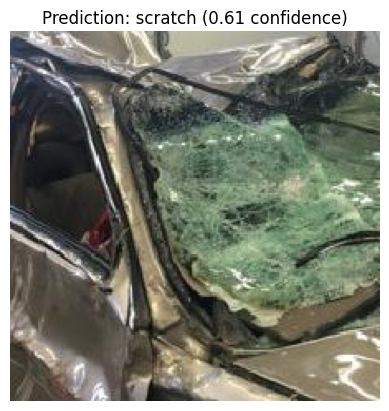


Final Prediction: scratch with 0.61 confidence


In [3]:
# Install dependencies (if not done yet)
#!pip install -q tensorflow huggingface_hub

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from huggingface_hub import snapshot_download
from google.colab import files

# Step 1: Download model from Hugging Face
model_dir = snapshot_download("chinesemusk/car-damage-resnet50")

# Step 2: Load the model using TFSMLayer for TensorFlow SavedModel format
model = tf.keras.layers.TFSMLayer(model_dir, call_endpoint="serving_default")

# Step 3: Upload an image from Colab
uploaded = files.upload()
img_path = next(iter(uploaded))

# Step 4: Preprocess image
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

img_preprocessed = prepare_image(img_path)

# Step 5: Running inference
output = model(img_preprocessed)
logits = output['output_0']
probs = tf.sigmoid(logits).numpy()[0]

# Step 6: Interpret results
labels = ['dent', 'scratch', 'crack', 'broken_light', 'glass_damage', 'no_damage']
predicted_class_index = np.argmax(probs)
confidence = probs[predicted_class_index]
predicted_class = labels[predicted_class_index]

# Print the class probabilities for all labels
print("Class probabilities:")
for label, prob in zip(labels, probs):
    print(f"{label}: {prob:.4f}")


img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class} ({confidence:.2f} confidence)")
plt.show()


print(f"\nFinal Prediction: {predicted_class} with {confidence:.2f} confidence")
